# CoVid Classification

In [1]:
# loading data

import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\Priya DataSets\covid19-dataset.csv')

In [2]:
#inspecting

data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [3]:
data.tail(25)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
21459,NaN,Belize,13.193900,-59.543200,4/12/20,14,2,0
21460,NaN,Laos,19.856270,102.495496,4/12/20,19,0,0
21461,NaN,Libya,26.335100,17.228331,4/12/20,25,1,9
21462,NaN,West Bank and Gaza,31.952200,35.233200,4/12/20,290,2,58
21463,NaN,Guinea-Bissau,11.803700,-15.180400,4/12/20,38,0,0
21464,NaN,Mali,17.570692,-3.996166,4/12/20,105,9,22
21465,NaN,Saint Kitts and Nevis,17.357822,-62.782998,4/12/20,12,0,0
21466,Northwest Territories,Canada,64.825500,-124.845700,4/12/20,5,0,0
21467,Yukon,Canada,64.282300,-135.000000,4/12/20,8,0,0
21468,NaN,Kosovo,42.602636,20.902977,4/12/20,283,7,58


In [4]:
#info

print(data.shape)
print('\n')
print(data.describe())

(21484, 8)


                Lat          Long      Confirmed        Deaths     Recovered
count  21484.000000  21484.000000   21484.000000  21484.000000  21484.000000
mean      21.433571     22.597991    1270.960808     64.787656    308.672035
std       24.740996     70.571139   12412.721916    744.692891   3188.582056
min      -51.796300   -135.000000      -1.000000      0.000000      0.000000
25%        7.000000    -19.020800       0.000000      0.000000      0.000000
50%       23.659750     20.921188       1.000000      0.000000      0.000000
75%       41.204400     81.000000      93.000000      1.000000      5.000000
max       71.706900    178.065000  555313.000000  22020.000000  64281.000000


In [5]:
#info on dtypes

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21484 entries, 0 to 21483
Data columns (total 8 columns):
Province/State    6560 non-null object
Country/Region    21484 non-null object
Lat               21484 non-null float64
Long              21484 non-null float64
Date              21484 non-null object
Confirmed         21484 non-null int64
Deaths            21484 non-null int64
Recovered         21484 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB
None


In [6]:
#checking the missing values

print(data.isnull().sum())

Province/State    14924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [7]:
# since majority of the missing values are from Province/State
# Using Reverse GeoCode to obtain these values

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#constructing the object

locator = Nominatim( user_agent = 'myGeoCoder' , timeout = 10)

coordinates = (40.0691 , 45.0382)

location  = locator.reverse(coordinates)
location.raw

{'place_id': 280643689,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 10852606,
 'lat': '39.9754378',
 'lon': '44.9062377',
 'display_name': 'Վեդու շրջան, Արարատի մարզ, 0601, Armenia',
 'address': {'state_district': 'Վեդու շրջան',
  'state': 'Արարատի մարզ',
  'postcode': '0601',
  'country': 'Armenia',
  'country_code': 'am'},
 'boundingbox': ['39.766172', '40.191795', '44.6297977', '45.117173']}

In [8]:
# since it is observed that obtaining the exact state/province many of whom are in their nativue lingual scripts
#hence dropping the idea of Reverse GeoCoding

#example = 'state': 'Արարատի մարզ'

In [20]:
print(data.groupby(['Country/Region']).size())

Country/Region
Afghanistan           82
Albania               82
Algeria               82
Andorra               82
Angola                82
                      ..
West Bank and Gaza    82
Western Sahara        82
Yemen                 82
Zambia                82
Zimbabwe              82
Length: 185, dtype: int64


In [22]:
#sorting data according to descending order of cases in Country/Region for confirmed cases

data.groupby('Country/Region')['Confirmed'].max()

Country/Region
Afghanistan            607
Albania                446
Algeria               1914
Andorra                638
Angola                  19
                      ... 
West Bank and Gaza     290
Western Sahara           6
Yemen                    1
Zambia                  43
Zimbabwe                14
Name: Confirmed, Length: 185, dtype: int64

In [34]:
#creating new dataframe

df = data.sort_values('Confirmed' , ascending = True).drop_duplicates('Country/Region' , keep = 'last')
df.drop('Province/State' , axis=1 , inplace = True)
df.set_index('Date' , inplace = True)

In [35]:
df

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
4/12/20,Yemen,15.552727,48.516388,1,0,0
4/10/20,Papua New Guinea,-6.315000,143.955500,2,0,0
4/12/20,Timor-Leste,-8.874217,125.727539,2,0,0
4/11/20,South Sudan,6.877000,31.307000,4,0,0
4/8/20,Sao Tome and Principe,0.186360,6.613081,4,0,0
...,...,...,...,...,...,...
4/12/20,Germany,51.000000,9.000000,127854,3022,60300
4/12/20,France,46.227600,2.213700,132591,14393,27186
4/12/20,Italy,43.000000,12.000000,156363,19899,34211


In [36]:
df1 = df.sample(100)

In [38]:
df1

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
4/10/20,Papua New Guinea,-6.3150,143.9555,2,0,0
4/12/20,Singapore,1.2833,103.8333,2532,8,560
4/12/20,Burundi,-3.3731,29.9189,5,0,0
4/12/20,Indonesia,-0.7893,113.9213,4241,373,359
4/12/20,Maldives,3.2028,73.2207,20,0,14
...,...,...,...,...,...,...
4/12/20,Dominica,15.4150,-61.3710,16,0,8
4/12/20,Bolivia,-16.2902,-63.5887,300,24,2
4/12/20,Lebanon,33.8547,35.8623,630,20,80


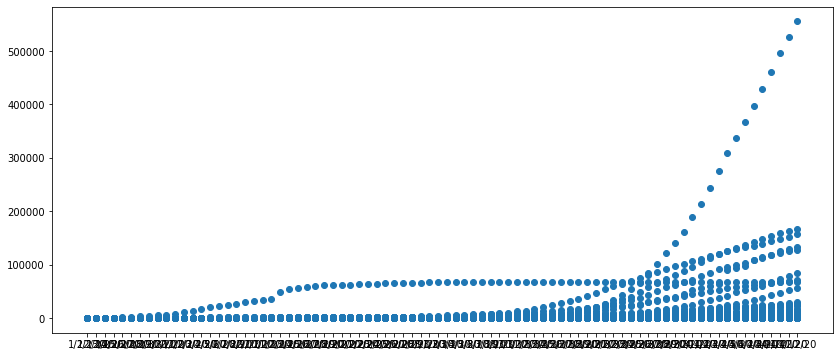

In [42]:
plt.figure(figsize=[14,6])
plt.scatter(y = 'Confirmed' , x = 'Date' , data = data )
plt.show()

In [ ]:
X = 